<a href="https://colab.research.google.com/github/CRPeace/Coding_Dojo_Project_2/blob/main/C_Peace_Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metabolic Syndrome Prediction**
### **Machine Learning**

Cameron Peace


## **Project Description**

***To predict metabolic syndrome, yes or no, based on common risk factors***

### **Task**


Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

* [x] Deleted unnecessary columns.
* [x] Deleted duplicate rows.
* [x] Identified and addressed missing values.
* [x] Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
* [x] Produced univariate visuals for the target and all features.
* [x] Identified outliers.
* [x] Clearly commented all of your cleaning steps and described any decisions you made.

### **Data Background:**

* ***Goal: To predict metabolic syndrome, yes or no based on common risk factors***
* The dataset can be found [here](https://data.world/informatics-edu/metabolic-syndrome-prediction) on data.world.
> The dataset for analysis came from the NHANES initiative where the following variables were combined from multiple tables with SQL: abnormal waist circumference, triglycerides above 150, HDL cholesterol below 50 in women or 40 in men, history of hypertension and mildly elevated fasting blood sugar (100-125). Numerous other variables were added, such as uric acid, race, income, etc.
* From CDC website: More information on [NHANES](https://www.cdc.gov/nchs/nhanes/about_nhanes.htm) 
> The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation.
* It is not clear from the description on data.world when the data were collected and what regions or demographic groups the individuals in the study represent.
* It was uploaded to data.world by Robert Hoyt MD on July 22nd, 2019.

### **Data Dictionary:**

* ***seqn*** -- integer  --  Likely 'sequence number', old index column
* ***age*** -- integer  --  age
* ***sex*** -- string  --  sex
* ***marital*** -- string  --  marital status
* ***income*** -- integer  --  monthly income
* ***race***  --  string  --  ethnicity
* ***waistcirc***  --  decimal  --  waist circumference in cm
* ***bmi***  --  decimal  --  body mass index
* ***albuminuria***  --  integer  -- Albuminuria stage. Albuminuria is a sign of kidney disease and means that you have too much albumin in your urine
* ***uralbcr***  --  decimal  --  Urine Albumin-Creatinine ratio
* ***uricacid***  --  decimal  --  uric acid level
* ***bloodglucose***  --  integer  --  blood glucose level
* ***hdl***  --  integer  --  HDL (High-Density Lipoprotein) level
* ***triglycerides***  --  integer  --  triglycerides level mg/Dl
* ***metabolicsyndrome***  --  string  --  	Whether the patient suffers from metabolic syndrome or not

### **Import Libraries**

In [1]:
# Analysis, Plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **1. Load and inspect the data**

### **Load the Data**

In [2]:
# Load Data
df = pd.read_csv('/content/Metabolic  Syndrome.csv')

# Making a back up for reference
df_original = df.copy()

### **Inspect the Data**

In [3]:
# Display a sample of rows from the data
df.sample(5)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
1806,69513,46,Male,Married,9000.0,Black,97.1,24.0,0,6.27,4.8,89,46,97,No MetSyn
844,65571,74,Female,Widowed,1000.0,Asian,94.2,27.3,0,3.06,4.6,132,58,96,MetSyn
498,64128,59,Male,Divorced,2500.0,White,NaN,39.2,0,3.12,9.1,103,33,83,No MetSyn
544,64333,46,Male,Divorced,2000.0,Asian,86.3,26.4,0,2.05,3.8,102,59,174,No MetSyn
1157,66881,40,Female,Married,9000.0,Asian,83.1,21.7,0,16.67,4.4,101,70,90,No MetSyn


In [4]:
# View shape, data types, summary statistics, and column names for easy copy/paste
display(df.info(), df.describe().T, df.describe(include='object'), df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


None

,count,mean,std,min,25%,50%,75%,max
seqn,2401.0,67030.674302,2823.565114,62161.0,64591.000,67059.00,69495.000,71915.0
Age,2401.0,48.691795,17.632852,20.0,34.000,48.00,63.000,80.0
Income,2284.0,4005.253940,2954.032186,300.0,1600.000,2500.00,6200.000,9000.0
WaistCirc,2316.0,98.307254,16.252634,56.2,86.675,97.00,107.625,176.0
BMI,2375.0,28.702189,6.662242,13.4,24.000,27.70,32.100,68.7
Albuminuria,2401.0,0.154102,0.422780,0.0,0.000,0.00,0.000,2.0
UrAlbCr,2401.0,43.626131,258.272829,1.4,4.450,7.07,13.690,5928.0
UricAcid,2401.0,5.489046,1.439358,1.8,4.500,5.40,6.400,11.3
BloodGlucose,2401.0,108.247813,34.820657,39.0,92.000,99.00,110.000,382.0
HDL,2401.0,53.369429,15.185537,14.0,43.000,51.00,62.000,156.0


,Sex,Marital,Race,MetabolicSyndrome
count,2401,2193,2401,2401
unique,2,5,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


Index(['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
Initial Observations:
* We appear to have missing values in at least 4 columns
* 'seqn' is an old index and will be dropped
* The waist measurement appears to be in cm based on the mean & IQR, and some research on appropriate ranges
* The majority of these patients are overweight
* It looks like albuminuria may have 3 stages: 0, 1, & 2
* We have a massive outlier in 'UrAlbCr that is likely an error
* We have a similar such entry in 'Tryiglycerides' that is likely an error
</i></font>

## **2. Clean the Data**

### **Inspect Column Names for Errors and Adjust to snake_case if Necessary**


In [5]:
# Display column names
df.columns

Index(['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')

In [6]:
# Adjusting column names with a function
def adjust_column_names(name):
  new_name = ''
  for i in name:
    if i.isupper() and len(name) > 3:
      new_name += '_' + i.lower()
    elif len(name) <= 4:
      new_name = name.lower()
    else:
      new_name += i
  return new_name.strip('_')

df = df.rename(columns = lambda x: adjust_column_names(x))
df.columns

Index(['seqn', 'age', 'sex', 'marital', 'income', 'race', 'waist_circ', 'bmi',
       'albuminuria', 'ur_alb_cr', 'uric_acid', 'blood_glucose', 'hdl',
       'triglycerides', 'metabolic_syndrome'],
      dtype='object')

### **Remove Unnecessary Columns**

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
Dropping 'seq' as it is an old index column and not needed
</i></font>

In [7]:
# Dropping 'seqn'
df = df.drop(columns='seqn').copy()
df.columns

Index(['age', 'sex', 'marital', 'income', 'race', 'waist_circ', 'bmi',
       'albuminuria', 'ur_alb_cr', 'uric_acid', 'blood_glucose', 'hdl',
       'triglycerides', 'metabolic_syndrome'],
      dtype='object')

### **Remove Unecessary Rows**

#### **Duplicates**

In [8]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### **Inspect Column Datatypes for Errors**

In [9]:
# Display column names and datatypes
df.dtypes

age                     int64
sex                    object
marital                object
income                float64
race                   object
waist_circ            float64
bmi                   float64
albuminuria             int64
ur_alb_cr             float64
uric_acid             float64
blood_glucose           int64
hdl                     int64
triglycerides           int64
metabolic_syndrome     object
dtype: object

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
All columns appear to have the appropriate data types.
</i></font>

### **Inspect Values for Errors**

#### **Numeric Columns**

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
Checking for unusual or impossible values.
</i></font>

In [10]:
# Display the descriptive statistics for the numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2401.0,48.691795,17.632852,20.0,34.000,48.00,63.000,80.0
income,2284.0,4005.253940,2954.032186,300.0,1600.000,2500.00,6200.000,9000.0
waist_circ,2316.0,98.307254,16.252634,56.2,86.675,97.00,107.625,176.0
bmi,2375.0,28.702189,6.662242,13.4,24.000,27.70,32.100,68.7
albuminuria,2401.0,0.154102,0.422780,0.0,0.000,0.00,0.000,2.0
ur_alb_cr,2401.0,43.626131,258.272829,1.4,4.450,7.07,13.690,5928.0
uric_acid,2401.0,5.489046,1.439358,1.8,4.500,5.40,6.400,11.3
blood_glucose,2401.0,108.247813,34.820657,39.0,92.000,99.00,110.000,382.0
hdl,2401.0,53.369429,15.185537,14.0,43.000,51.00,62.000,156.0
triglycerides,2401.0,128.125364,95.322477,26.0,75.000,103.00,150.000,1562.0


<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
* Possible errors or outliers in 'ur_alb_cr' and 'triglyerides'
</i></font>

##### Checking 'ur_alb_cr'

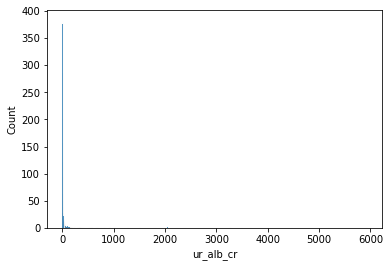

In [11]:
# viewing a histogram to quickly put things in context.
sns.histplot(data=df, x='ur_alb_cr');

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
Yeah, that looks a bit 'off', let's look at this column with values between 0 and 100.  Then look at all values above 100.
</i></font>

,age,sex,marital,income,race,waist_circ,bmi,albuminuria,ur_alb_cr,uric_acid,blood_glucose,hdl,triglycerides,metabolic_syndrome
17,77,Female,Single,1600.0,MexAmerican,118.6,30.6,1,187.41,4.2,178,46,107,MetSyn
28,52,Male,Married,3500.0,White,110.0,31.4,1,120.73,4.1,258,39,223,MetSyn
29,64,Male,Divorced,2000.0,White,74.6,16.6,1,172.13,6.7,92,56,91,No MetSyn
36,69,Female,Widowed,800.0,Hispanic,103.5,32.7,2,821.71,9.3,125,40,286,MetSyn
50,80,Male,Married,2500.0,White,88.6,21.7,2,3267.57,4.7,135,44,75,No MetSyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,70,Female,Married,1700.0,Black,108.0,34.6,1,224.32,6.3,123,67,192,MetSyn
2304,71,Female,Divorced,800.0,White,107.2,29.3,1,167.74,5.1,88,54,78,No MetSyn
2306,64,Male,Married,NaN,Asian,105.1,27.5,1,152.24,6.6,121,58,151,MetSyn
2324,65,Male,Married,NaN,Asian,83.1,20.9,1,117.65,5.5,96,55,63,No MetSyn


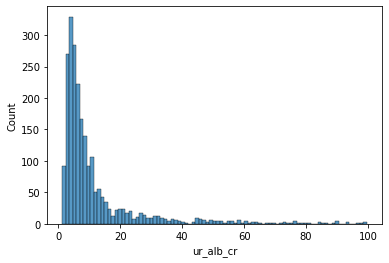

In [12]:
# looking at 'ur_alb_cr' between 0 and 100
sns.histplot(data=df[df['ur_alb_cr'].between(0,100)], x='ur_alb_cr')

# looking at rows with a value greater than 100
df[df['ur_alb_cr'] > 100]

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
Okay, doing some digging reveals that reasonable values for this ratio are between 17 and 300, but high values are not unreasonable.
</i></font>

In [13]:
df[df['ur_alb_cr'] > 1000]

,age,sex,marital,income,race,waist_circ,bmi,albuminuria,ur_alb_cr,uric_acid,blood_glucose,hdl,triglycerides,metabolic_syndrome
50,80,Male,Married,2500.0,White,88.6,21.7,2,3267.57,4.7,135,44,75,No MetSyn
140,80,Female,Married,2500.0,White,97.5,30.8,2,3284.62,7.8,132,65,130,MetSyn
212,74,Female,Divorced,800.0,Asian,111.7,35.3,2,1777.05,7.2,104,37,111,MetSyn
246,50,Male,Separated,2000.0,Black,75.5,19.6,2,2750.00,5.7,127,80,92,No MetSyn
312,39,Female,Single,9000.0,Black,118.0,37.5,2,2238.10,7.1,291,34,248,MetSyn
324,48,Male,Married,1500.0,MexAmerican,123.0,38.5,2,2403.85,6.6,100,53,166,MetSyn
418,69,Male,Married,2500.0,Asian,93.2,27.2,2,1817.31,6.7,99,64,93,No MetSyn
872,63,Female,Separated,1600.0,MexAmerican,111.5,35.2,2,1276.60,8.1,47,60,159,MetSyn
891,80,Female,Separated,2500.0,Black,103.1,30.4,2,1511.11,6.2,250,47,80,MetSyn
910,58,Male,Married,2000.0,MexAmerican,100.6,25.6,2,3666.67,8.8,211,48,188,No MetSyn


<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
There are enough high values here that while I find them suspicious, I don't have the necessary expertise to make a judgement call on what the upper limits may be.  I don't see a clear pattern that points to a mistake, so we'll just leave these outliers in the dataset.
</i></font>

##### Checking 'triglycerides'

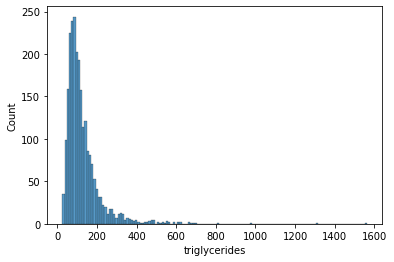

In [14]:
# taking a look at the value distribution
sns.histplot(data=df, x='triglycerides')

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
Normal triglyceride levels (mg/Dl) are between 75-200, with high levels 200-500, and very high 500 and above.  This may be another case where what looks like errors are just extreme cases of very sick patients.
</i></font>

In [15]:
# Checking values above 800
df[df['triglycerides'] > 800]

,age,sex,marital,income,race,waist_circ,bmi,albuminuria,ur_alb_cr,uric_acid,blood_glucose,hdl,triglycerides,metabolic_syndrome
829,50,Male,Single,1600.0,MexAmerican,92.9,27.6,2,844.83,4.2,335,35,979,MetSyn
1016,58,Male,Married,9000.0,White,97.6,28.5,0,7.65,4.9,126,28,1311,MetSyn
2092,45,Female,NaN,2000.0,White,102.2,28.1,0,23.28,6.5,75,27,1562,MetSyn
2196,52,Male,Divorced,1000.0,White,114.2,33.4,2,3500.00,8.1,128,29,814,MetSyn


<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
The highest level of triglycerides I can find is 4,155 mg/Dl from this [case](https://www.guinnessworldrecords.com/world-records/highest-triglyceride-level#:~:text=Christopher%20Bogdewic%20(USA)%20was%20measured,Family%20Medicine%2C%20Virginia%2C%20USA.).  I'm going to assume these values are outliers, but do not represent errors, so they will stay in the dataset
</i></font>

#### **Inspect Numeric Values with Visualizations**

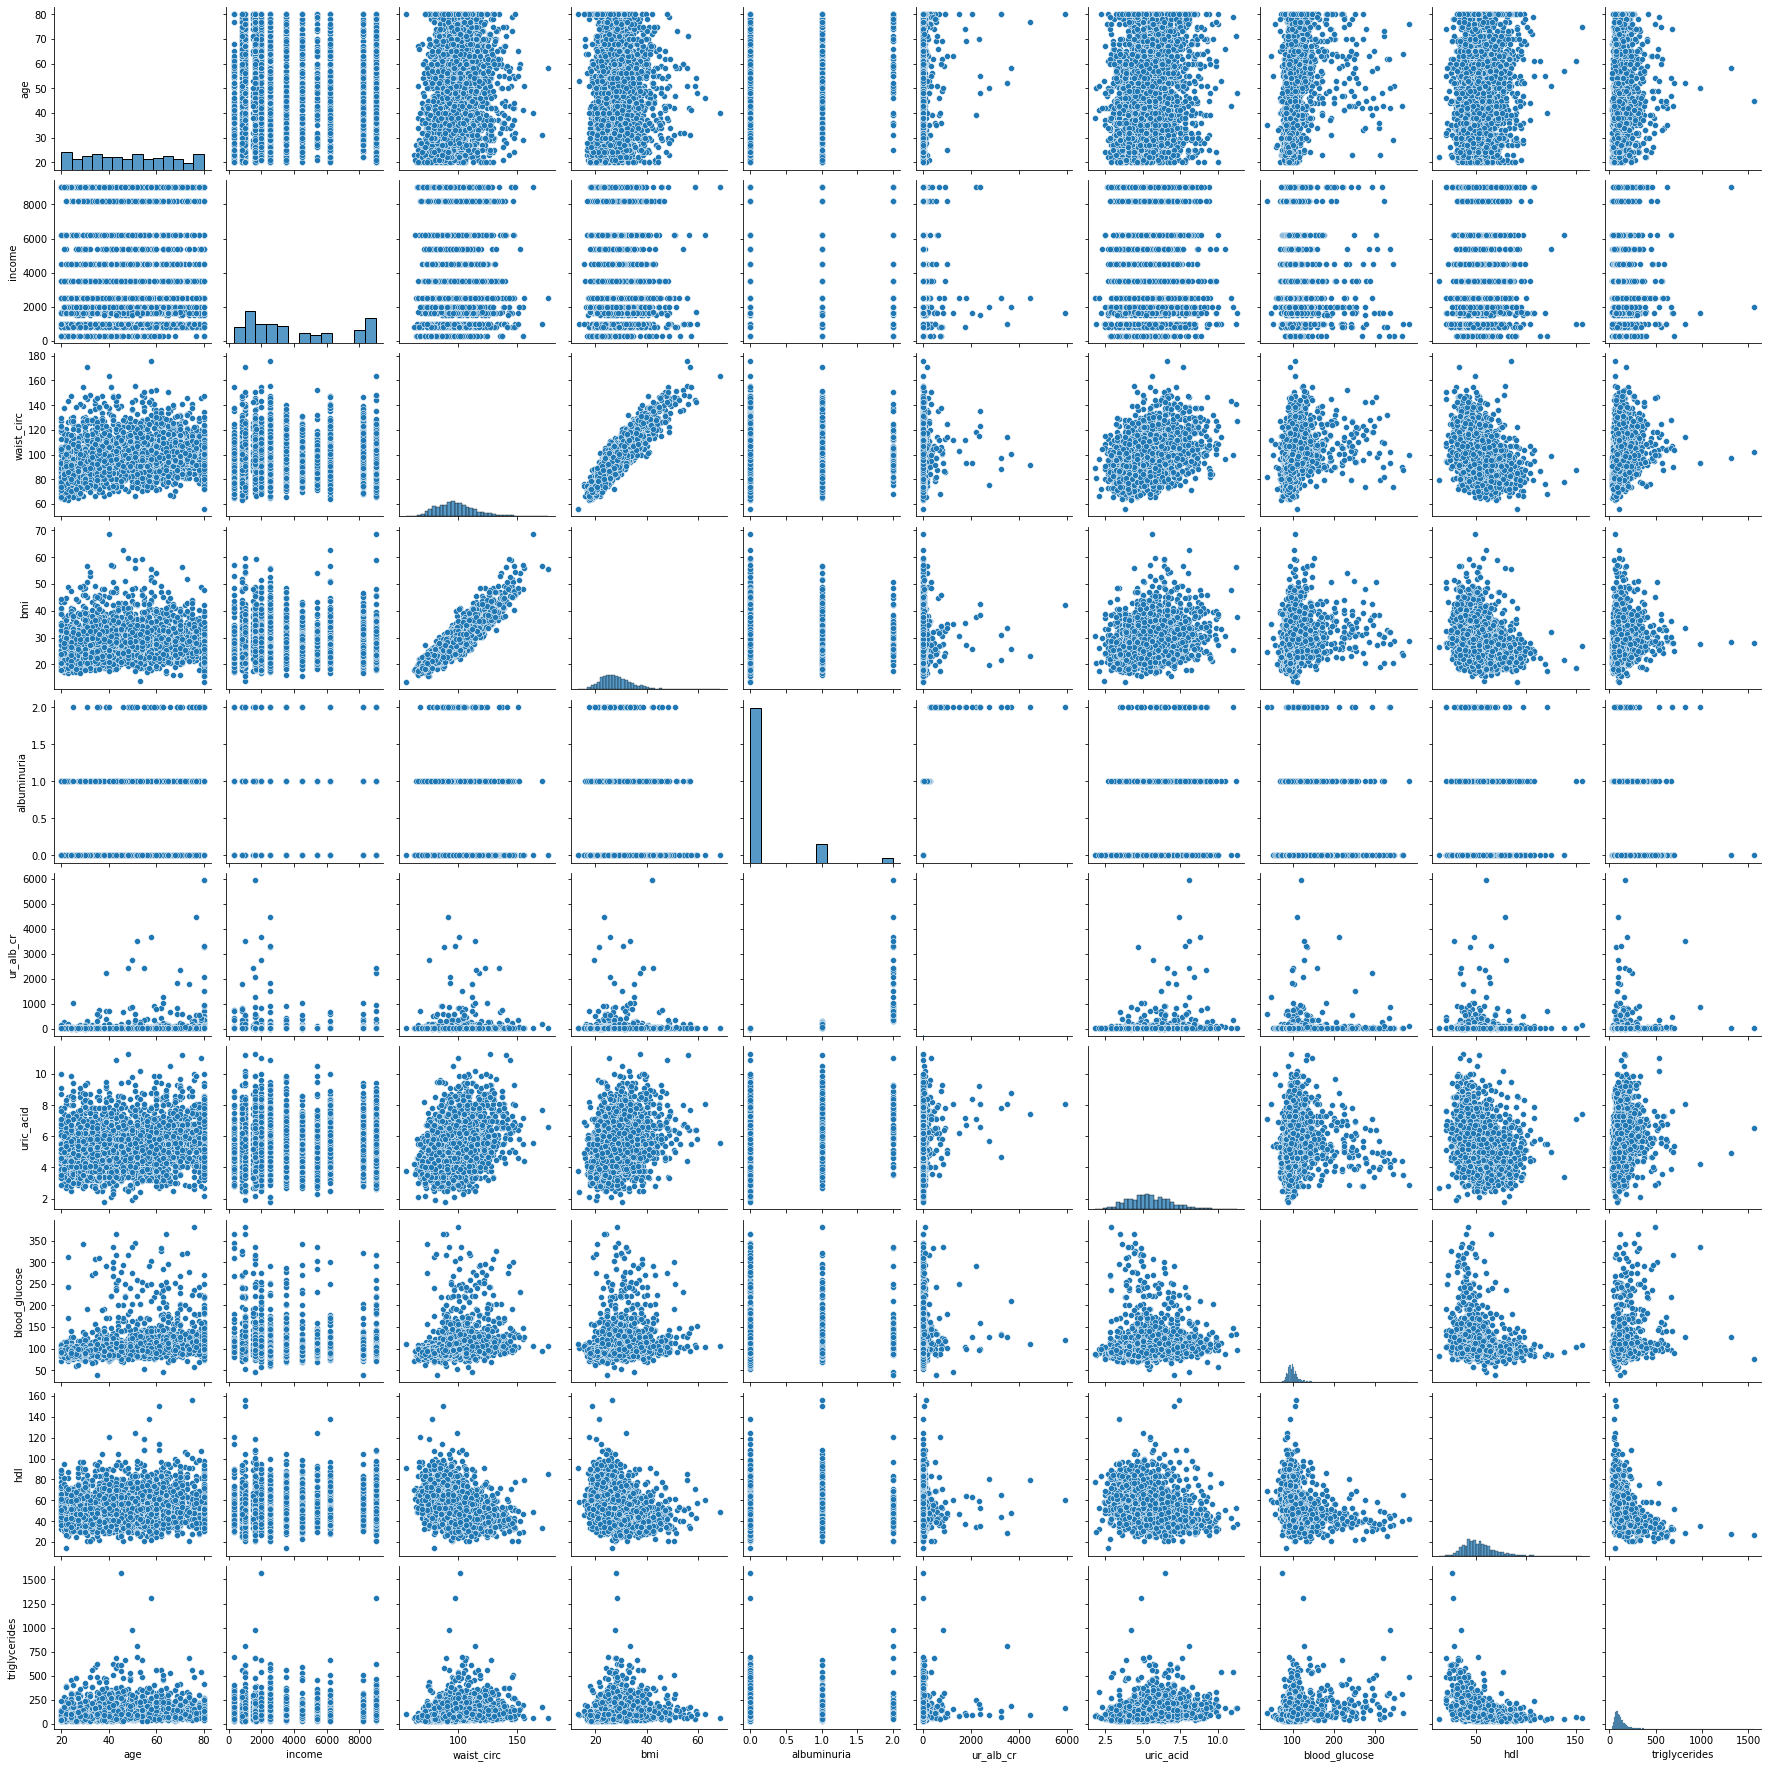

In [16]:
sns.pairplot(df);

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
This is definitely overkill, but I prefer it because it gives us a quick way to look at a lot of data in one line of code and see if anything jumps out, we'll explore another version of this plot later on, for now:
* There are a few big gaps in income, there may be missing values there or it might be related to the demographic that the patients represent
* It might be worth taking a closer look at 'bmi' and 'waist_circ'.  There seem to be some high values there that probably belong there, but there is definitely a skew.  The correlation between these two features is visibly evident in the scatter plots.
* Albuminuria is relatively rare in the dataset, assuming a 0 means no albuminuria.
* We can see many of these distributions are heavily skewed, will need to keep this in mind if we need to impute values.
</i></font>

##### Checking 'income'

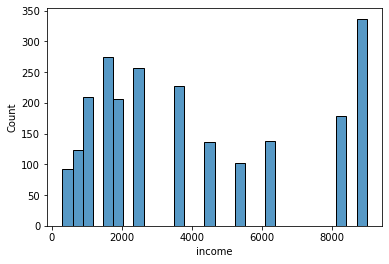

In [17]:
# looking at the income column
sns.histplot(data=df, x='income', bins=30);

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
It looks to me like everyone's income was binned in whatever form/questionnaire was filled out for these data.  Let's see if we can get an even clearer idea of what the bins were.  There seems to be a few holes in this distribution.
</i></font>

In [18]:
# displaying the unique income values
# sorted and if np.isnan are used because the nan was somehow throwing off the sorting function
display(sorted([i for i in df['income'].unique() if np.isnan(i) == False]))

[300.0,
 800.0,
 1000.0,
 1500.0,
 1600.0,
 1700.0,
 2000.0,
 2500.0,
 3500.0,
 4500.0,
 5400.0,
 6200.0,
 8200.0,
 9000.0]

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
* It looks to me like we have a hole in our data between 6200 and 8200.  We'll look at more missing values in the next section.
* It appears like there are a suprising amount of high earners in this dataset, but I think that because the data were binned, there was likely a box of "$9,000 month or above" or something similar.  If the survery was more specific, I would guess we'd see a more gradual tail representing high earners, instead of a spike at 9,000.
</i></font>

##### Checking 'waist_circ' and 'bmi'

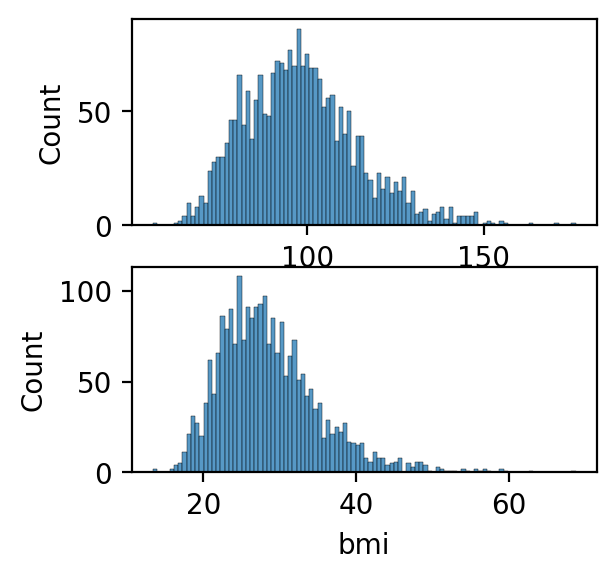

In [19]:
# building histograms to get a better sense of the distributions
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(3,3), dpi=200)
sns.histplot(data=df, x='waist_circ', bins=100, ax=ax1)
sns.histplot(data=df, x='bmi', bins=100, ax=ax2);

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
If not for the high value outliers these would be resemble normal distributions.  I think that these outliers make sense for this dataset (i.e. obese patients are at higher risk of metabolic syndrome), but we'll take look in case there are outliers that represent errors.
</i></font>

In [20]:
display(df[df['bmi'] > 55], df[df['waist_circ'] > 150])

,age,sex,marital,income,race,waist_circ,bmi,albuminuria,ur_alb_cr,uric_acid,blood_glucose,hdl,triglycerides,metabolic_syndrome
77,71,Female,Widowed,1000.0,White,140.6,56.3,1,30.21,11.2,134,53,167,MetSyn
169,40,Female,Married,9000.0,Black,163.5,68.7,0,20.69,5.6,107,49,61,MetSyn
507,51,Female,Single,9000.0,Black,144.4,59.0,0,13.49,6.4,109,71,55,MetSyn
702,51,Female,Single,2500.0,Black,155.9,55.8,0,4.97,4.4,126,79,59,MetSyn
717,42,Male,NaN,6200.0,Black,147.5,56.6,1,31.45,6.4,136,35,102,MetSyn
1153,54,Female,Married,1700.0,White,142.8,59.2,0,9.65,6.4,103,43,139,MetSyn
1428,31,Female,Divorced,1000.0,White,170.5,56.8,1,180.56,7.7,94,33,176,MetSyn
1490,46,Female,Married,6200.0,Black,NaN,62.8,0,2.90,8.1,103,60,101,No MetSyn
1819,58,Male,NaN,2500.0,Black,176.0,55.7,0,2.27,6.6,106,85,64,MetSyn
2132,41,Female,Married,300.0,Black,155.0,57.1,0,6.64,5.5,147,47,78,MetSyn


,age,sex,marital,income,race,waist_circ,bmi,albuminuria,ur_alb_cr,uric_acid,blood_glucose,hdl,triglycerides,metabolic_syndrome
118,29,Male,Single,2000.0,Asian,154.7,48.3,0,4.73,7.2,122,30,199,MetSyn
169,40,Female,Married,9000.0,Black,163.5,68.7,0,20.69,5.6,107,49,61,MetSyn
702,51,Female,Single,2500.0,Black,155.9,55.8,0,4.97,4.4,126,79,59,MetSyn
1159,60,Male,Married,5400.0,White,152.4,54.1,0,9.47,6.7,231,40,155,MetSyn
1292,65,Male,Divorced,1600.0,MexAmerican,150.7,47.0,1,40.15,4.6,103,50,106,MetSyn
1428,31,Female,Divorced,1000.0,White,170.5,56.8,1,180.56,7.7,94,33,176,MetSyn
1684,55,Male,Separated,1000.0,Hispanic,151.0,48.4,2,352.94,6.4,132,21,215,MetSyn
1819,58,Male,NaN,2500.0,Black,176.0,55.7,0,2.27,6.6,106,85,64,MetSyn
1836,58,Male,Married,2000.0,White,151.8,51.5,1,55.13,5.8,128,29,145,MetSyn
2132,41,Female,Married,300.0,Black,155.0,57.1,0,6.64,5.5,147,47,78,MetSyn


<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
All of these values appear to be in the realm of possibilities.  Based on the skew of these columns, I would impute with median for missing values.
</i></font>

#### **Categorical Columns**

In [21]:
# Display the descriptive statistics for the non-numeric columns
df.describe(include='object')

,sex,marital,race,metabolic_syndrome
count,2401,2193,2401,2401
unique,2,5,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
* Our values for 'sex' are very close to even
* We are missing values for 'marital'
* We have an unbalanced target
</i></font>

In [22]:
# Inspect unique values in the object columns and for numeric columns that may actually be categorical 
for col in df.columns:
  if df[col].dtype == 'object' or len(df[col].unique()) <= 15:
    print(col.upper(), df[col].unique(), '\n------------>', str(df[col].dtype).upper(), '\n*******')

SEX ['Male' 'Female'] 
------------> OBJECT 
*******
MARITAL ['Single' 'Married' 'Widowed' 'Divorced' nan 'Separated'] 
------------> OBJECT 
*******
INCOME [8200. 4500.  800. 2000.   nan  300. 9000. 6200. 1000. 2500. 3500. 1500.
 1600. 5400. 1700.] 
------------> FLOAT64 
*******
RACE ['White' 'Asian' 'Black' 'MexAmerican' 'Hispanic' 'Other'] 
------------> OBJECT 
*******
ALBUMINURIA [0 1 2] 
------------> INT64 
*******
METABOLIC_SYNDROME ['No MetSyn' 'MetSyn'] 
------------> OBJECT 
*******


<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
No unusual values noted.
* 'albuminuria' is ordinal encoded
* The other 3 categorical features will need to be one hot encoded ('sex', 'marital', 'race')
</i></font>

#### Inspect Categoric Values with Visualizations

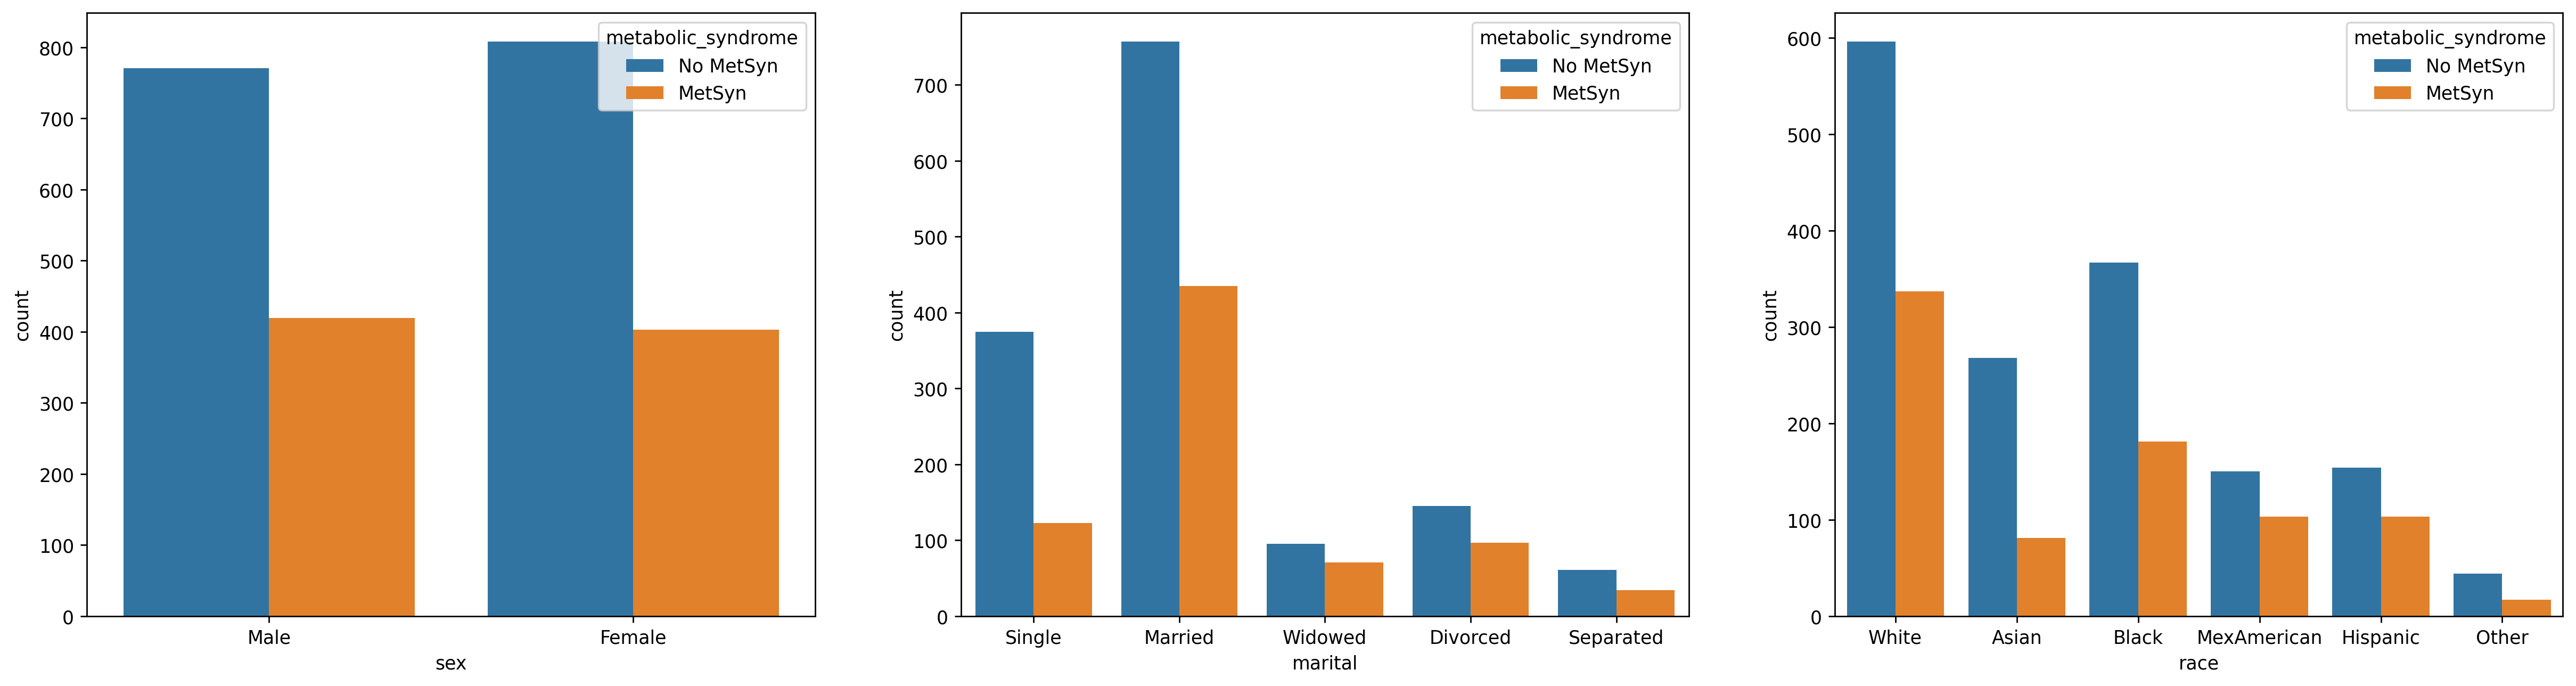

In [23]:
# plotting all categorical variables in histograms 
# grouped by 'metabolic_syndrome' to get a sense of distributions

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6), dpi=250)

sns.countplot(data=df, x='sex', hue='metabolic_syndrome', ax=ax1)
sns.countplot(data=df, x='marital', hue='metabolic_syndrome', ax=ax2)
sns.countplot(data=df, x='race', hue='metabolic_syndrome', ax=ax3)

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
All 3 of these categories look like they may turn out to just be noise 
* 'sex' looks like it may not have a large effect on disease outcomes, those ratios look very similar.
* 'marital' may have some effect, there seems to be higher ratio of metsyn among divorced and widowed, but that may just be a hidden variable exerting itself ('age')
* 'race' looks to have some effect (looks like there is a higher incidence in MexAmerican and Hispanic), but would consider removing it to see how it effects the model.
</i></font>

## **3. Further Explore the Data Through Visualizations**

### **Heatmap**

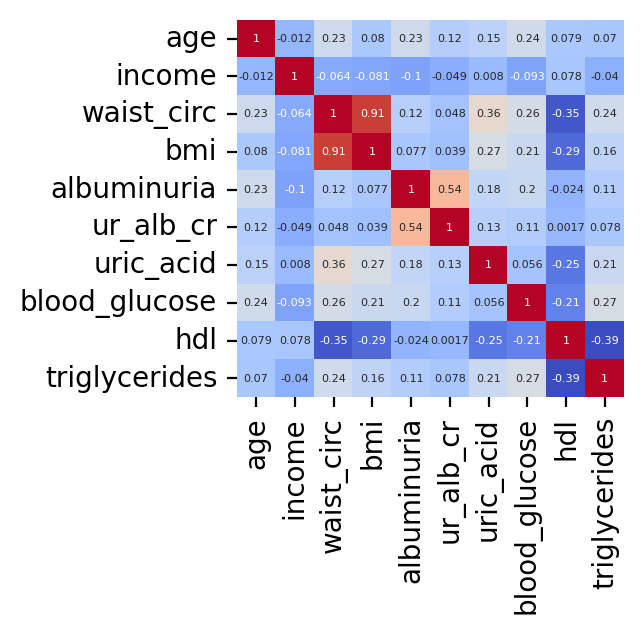

In [31]:
# viewing a heatmap to see correlation between features
plt.figure(figsize=(2.5,2.5), dpi=200)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, cbar=False, annot_kws={'fontsize':4});

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
* bmi and waist_circ of course are linked
* It also makes sense that albuminuria is correlated with ur_alb_cr
* There's also a weak correlation of waist_circ and uric_acid which may make sense later.
* In this case, the heat map is not contributing much that we haven't already discovered
</i></font>

### **Pairplot with added Target Dimension**

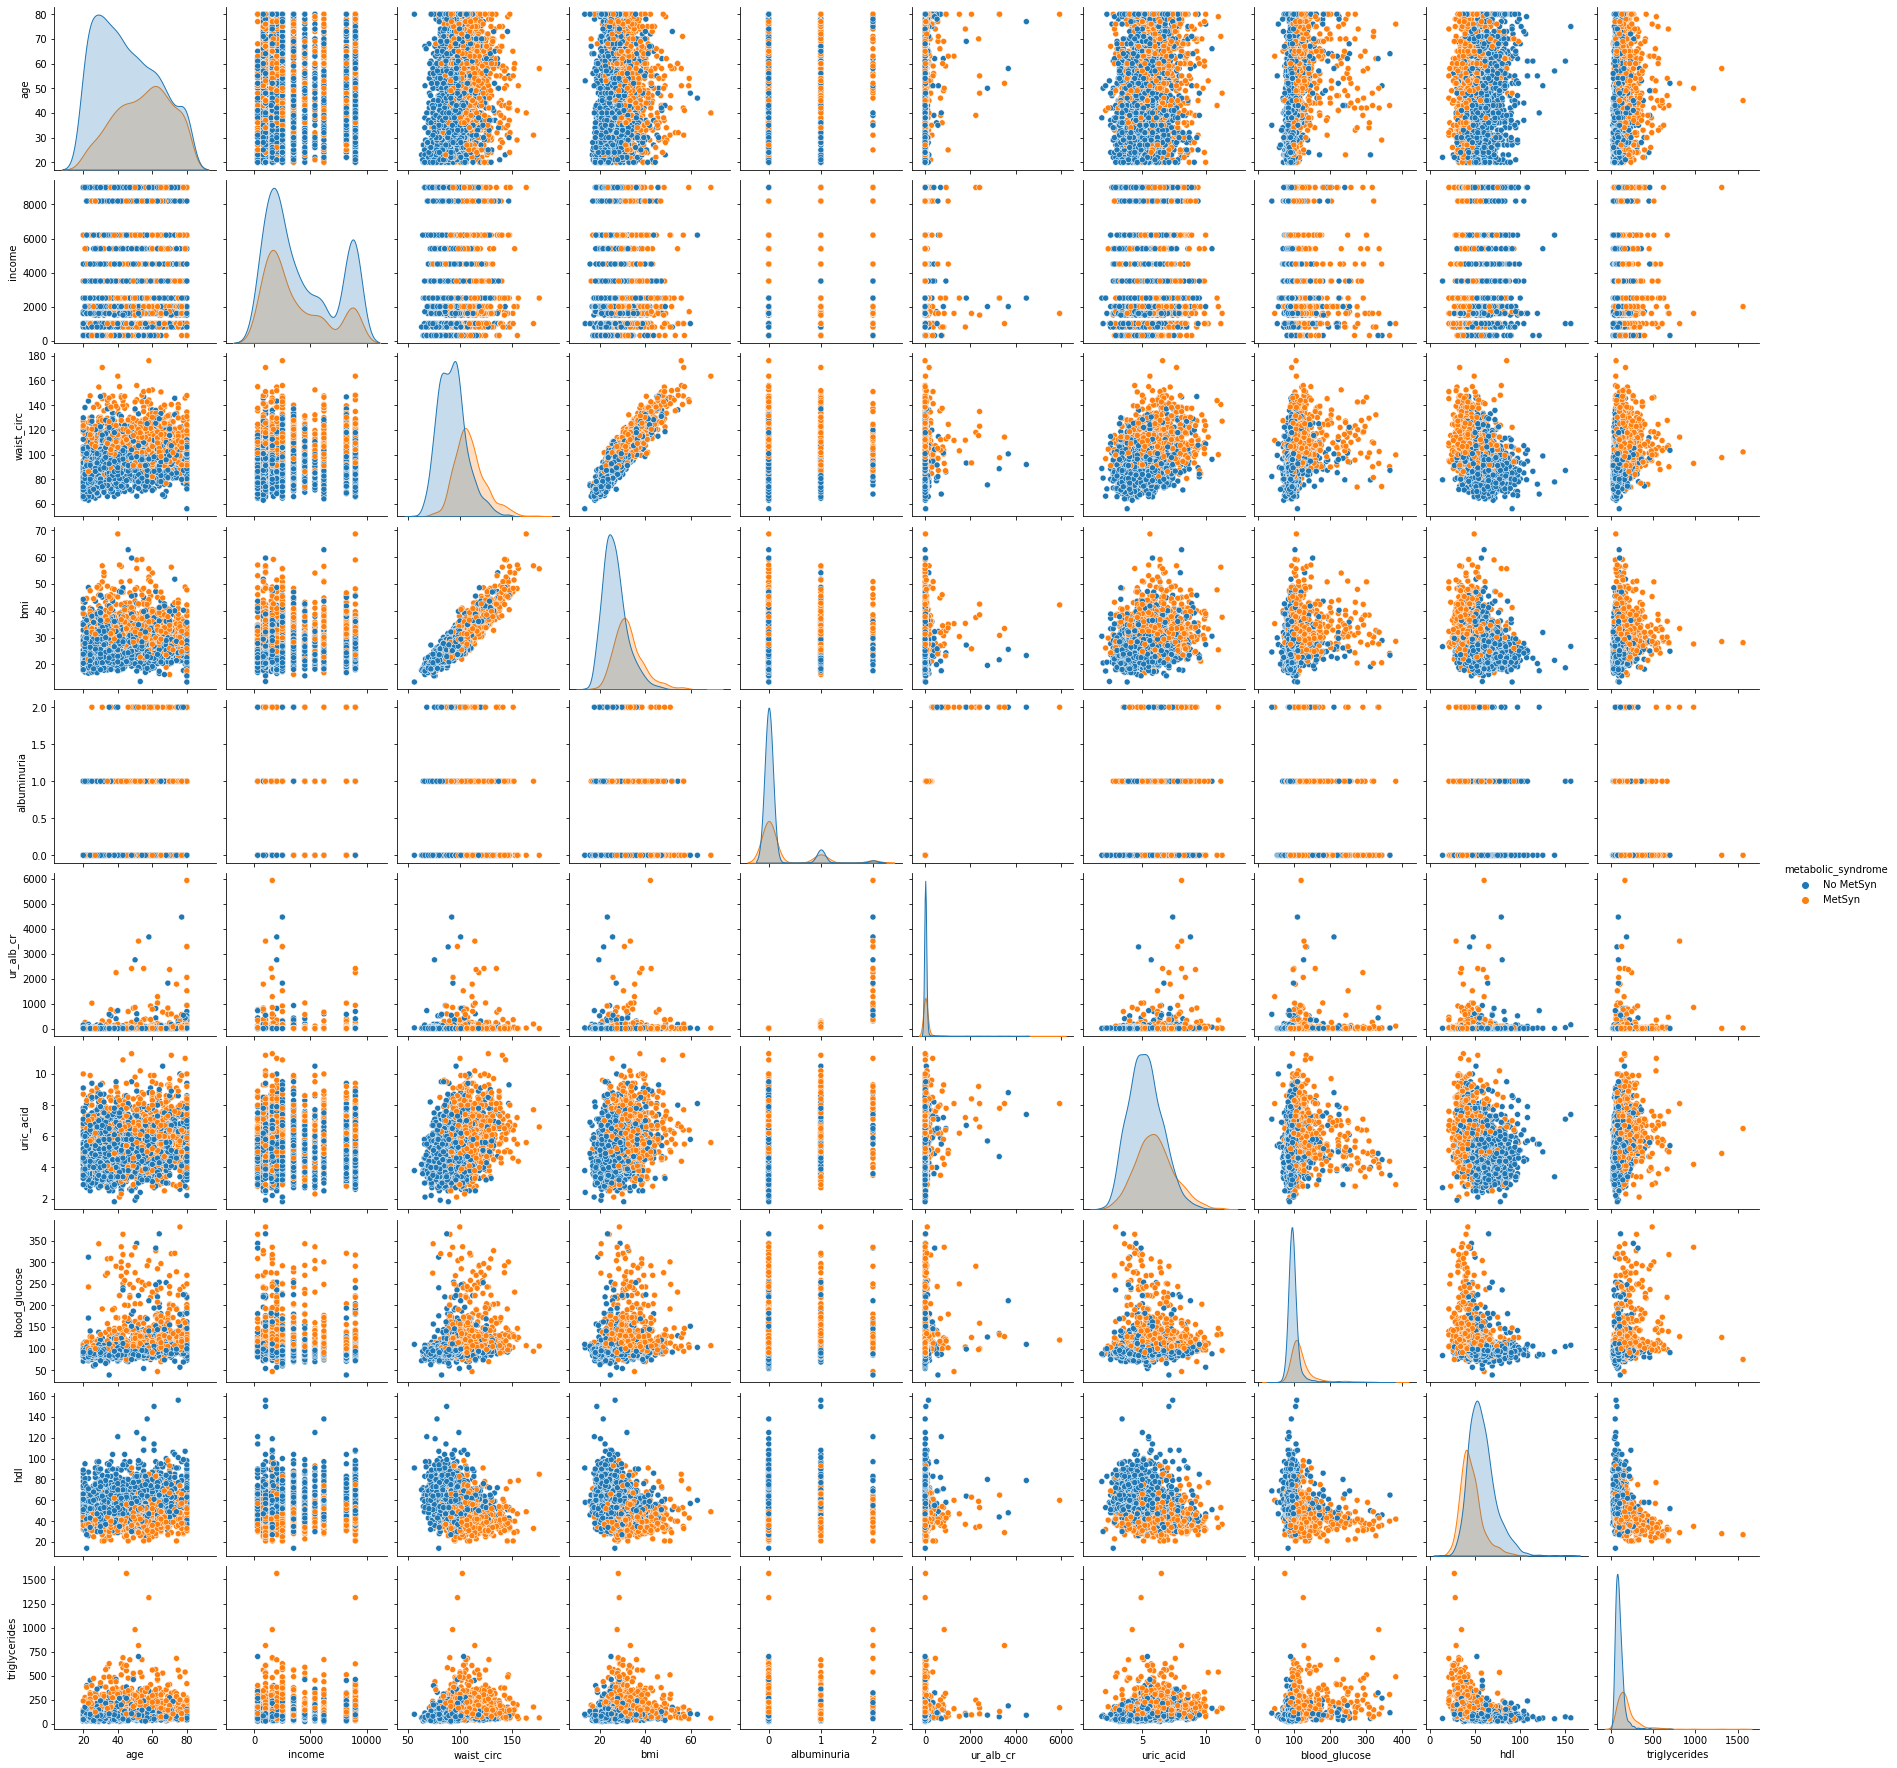

In [25]:
sns.pairplot(data=df, hue='metabolic_syndrome');

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
There is a lot here.  Blue = No Metabolic Syndrome (metsyn); Orange = Metabolic Syndrome We have scatterplots showing relationships between all of our numeric variables, and we can also see the distribution of the target.  I find the kde plots running along the diagonal to be particularly insightful
* 'Age': There are more older patients with metsyn than younger patients
* 'Income': We can see that our missing data has created a gap in the distribution so the data appears bi-modal, however, I don't believe that is actually the case.  It looks like income is evenly distributed between those with the syndrome and those without, this may be a good candidate for a feature to drop.
* 'Waist Circ': This appears to be a factor is risk of developing metsyn and appears to be linked to other features in the dataset by glancing at the scatterplots.
* 'BMI': Ditto for this feature, we might consider dropping one or the other of bmi and waist_circ and see how the model responds, since these features are intertwined.
* 'Ur_Alb_Cr':  It's interesting to note that very very high values in this category do not necessarily indicate metsyn, there are interactions here that I don't understand.
* 'Uric Acid', 'Blood Glucose', 'Triglycerides':  These columns appear to have similar interactions with metasyn.  They have an effect on outcomes, not huge, but present.
* 'HDL':  This is 'good' cholesterol, and we can see that for this feature, higher numbers are correlated with better outcomes in terms of the risk of metsyn.
</i></font>

## **4. Final Cleaning, Preparation Before Preprocessing**

### **Missing Values**

In [26]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 436 missing values.


In [27]:
# Display the count of missing values by column
print(df.isna().sum())

age                     0
sex                     0
marital               208
income                117
race                    0
waist_circ             85
bmi                    26
albuminuria             0
ur_alb_cr               0
uric_acid               0
blood_glucose           0
hdl                     0
triglycerides           0
metabolic_syndrome      0
dtype: int64


In [28]:
# Display the percentage of missing values by column
print(df.isna().sum()/len(df)*100)

age                   0.000000
sex                   0.000000
marital               8.663057
income                4.872970
race                  0.000000
waist_circ            3.540192
bmi                   1.082882
albuminuria           0.000000
ur_alb_cr             0.000000
uric_acid             0.000000
blood_glucose         0.000000
hdl                   0.000000
triglycerides         0.000000
metabolic_syndrome    0.000000
dtype: float64


In [29]:
# inspecting median and mean values for each column with missing we may impute
print(f"Income - Mean: {df['income'].mean()}, Median: {df['income'].median()}")
print(f"Waist_Circ - Mean: {df['waist_circ'].mean()}, Median: {df['waist_circ'].median()}")
print(f"BMI - Mean: {df['bmi'].mean()}, Median: {df['bmi'].median()}")

Income - Mean: 4005.2539404553413, Median: 2500.0
Waist_Circ - Mean: 98.30725388601036, Median: 97.0
BMI - Mean: 28.702189473684214, Median: 27.7


<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
This confirms what we were seeing in the distributions: We have skewed distributions, with higher values pushing the mean values up, by a small margin in the case of bmi and waist_circ and by a large margin in the case of income.
</i></font>

#### Replace NaNs with 'missing' for 'marital'

In [30]:
df['marital'] = df['marital'].fillna('missing')
df.isna().sum()

age                     0
sex                     0
marital                 0
income                117
race                    0
waist_circ             85
bmi                    26
albuminuria             0
ur_alb_cr               0
uric_acid               0
blood_glucose           0
hdl                     0
triglycerides           0
metabolic_syndrome      0
dtype: int64

#### **Missing Values Strategies and To-Do**

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
* 'marital':  We replaced the NaNs with 'missing'.  I suspect we may end up dropping this feature anyways
* 'income':  Impute with **median** during preprocessing.  This is due to a overall skewed distribution.  This is another column we are likely to drop from the features.
* 'waist_circ': Impute with **median** during preprocessing, due to skew of distribution.
* 'bmi': Impute with **median** during preprocessing, due to skew of distribution
</i></font>

##### **To Do before ML**

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
* Drop features
* Impute missing values
* Change target to 0, 1
</i></font>